<a href="https://colab.research.google.com/github/katherina-jiawen/InClassEcon441B/blob/main/Inclass_assignment_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/UCLA/Econ 441B/insurance.csv')

In [ ]:
df.loc[df['sex'] == 'female','sex'] = 1.
df.loc[df['sex'] == 'male','sex'] = 0.

df.loc[df['smoker'] == 'yes','smoker'] = 1.
df.loc[df['smoker'] == 'no','smoker'] = 0.


df.loc[df['region'] == 'southwest','region1'] = 1.
df.loc[df['region'] == 'southeast','region1'] = 0.
df.loc[df['region'] == 'northwest','region1'] = 0.
df.loc[df['region'] == 'northeast','region1'] = 0.

df.loc[df['region'] == 'southwest','region2'] = 0.
df.loc[df['region'] == 'southeast','region2'] = 1.
df.loc[df['region'] == 'northwest','region2'] = 0.
df.loc[df['region'] == 'northeast','region2'] = 0.


df.loc[df['region'] == 'southwest','region3'] = 0.
df.loc[df['region'] == 'southeast','region3'] = 0.
df.loc[df['region'] == 'northwest','region3'] = 1.
df.loc[df['region'] == 'northeast','region3'] = 0.

df.loc[df['region'] == 'southwest','region4'] = 0.
df.loc[df['region'] == 'southeast','region4'] = 0.
df.loc[df['region'] == 'northwest','region4'] = 0.
df.loc[df['region'] == 'northeast','region4'] = 1.


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region1,region2,region3,region4
0,19,1.0,27.900,0,1.0,southwest,16884.92400,1.0,0.0,0.0,0.0
1,18,0.0,33.770,1,0.0,southeast,1725.55230,0.0,1.0,0.0,0.0
2,28,0.0,33.000,3,0.0,southeast,4449.46200,0.0,1.0,0.0,0.0
3,33,0.0,22.705,0,0.0,northwest,21984.47061,0.0,0.0,1.0,0.0
4,32,0.0,28.880,0,0.0,northwest,3866.85520,0.0,0.0,1.0,0.0


#2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
df_subset = df[['age','sex','bmi','children','smoker','region1','region2','region3','region4']]

In [ ]:
data = np.array(df_subset)
target = np.array(df.iloc[:,6])
# get all the data excepts the one we need to predict (charges)

In [ ]:
data

array([[19, 1.0, 27.9, ..., 0.0, 0.0, 0.0],
       [18, 0.0, 33.77, ..., 1.0, 0.0, 0.0],
       [28, 0.0, 33.0, ..., 1.0, 0.0, 0.0],
       ...,
       [18, 1.0, 36.85, ..., 1.0, 0.0, 0.0],
       [21, 1.0, 25.8, ..., 0.0, 0.0, 0.0],
       [61, 1.0, 29.07, ..., 0.0, 1.0, 0.0]], dtype=object)

In [ ]:
target

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
cut = int((len(data)*.8)//1) #split the data into 80/20

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

#3.) Normalize the Data 

In [ ]:
from sklearn import preprocessing 

In [ ]:
in_data

array([[19, 1.0, 27.9, ..., 0.0, 0.0, 0.0],
       [18, 0.0, 33.77, ..., 1.0, 0.0, 0.0],
       [28, 0.0, 33.0, ..., 1.0, 0.0, 0.0],
       ...,
       [39, 0.0, 42.655, ..., 0.0, 0.0, 1.0],
       [63, 0.0, 21.66, ..., 0.0, 1.0, 0.0],
       [54, 1.0, 31.9, ..., 1.0, 0.0, 0.0]], dtype=object)

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [ ]:
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

#4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
#import LassoCV
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
a = modCV.alpha_ #Optimized Lambda

In [ ]:
a

176.27926602952408

#5.) Run a lasso regression with that Lambda



In [ ]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))
mod1.coef_

array([3528.01787345,    0.        , 1826.2934732 ,  357.05497525,
       9280.59465836,  -65.23906777,   -0.        ,    0.        ,
        184.60600107])

#6.) Visualize the coefficients 

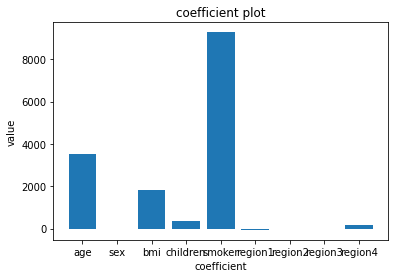

In [ ]:
x_axis = (['age','sex','bmi','children', 'smoker','region1','region2','region3','region4'])
y_axis = mod1.coef_

plt.bar(x_axis, y_axis)
plt.title('coefficient plot')
plt.xlabel('coefficient')
plt.ylabel('value')
plt.show()

# 7.) Interpret the coefficients

The values of the coefficient show that there is a positive relationship between (age, bmi,children number,smoke or not) and the insurance charge. Espeically for the smoke, it has a strong positive impact on insurance charge. People who smoke will have higher charge. 
Sex seems to have no effect on the charge. 
People live in southwest trend to have a lower insurance charge than other places and people live in northeast trend to have a higher insurance charge. People live in other two regions have no effect on the charges.


# 8.) Compare in and out of sample MSE’s

In [ ]:
#mod1.predict("in sample data")
#mod1.predict("out of sample data")

In [ ]:
from sklearn.metrics import mean_squared_error
in_y_pred = mod1.predict(np.array(in_data_scale))
out_y_pred = mod1.predict(np.array(out_data_scale))
out_sample_mse = mean_squared_error(out_y_pred,out_target)
in_sample_mse = mean_squared_error(in_y_pred,in_target)

In [ ]:
out_sample_mse

37305097.62688038

In [ ]:
in_sample_mse

36603102.01062052